In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

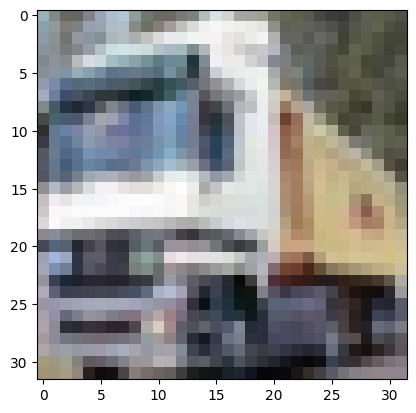

In [8]:
plt.imshow(X_train[1])

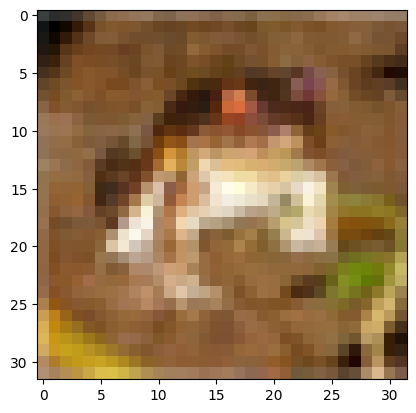

In [9]:
plt.imshow(X_train[0])
plt.show()


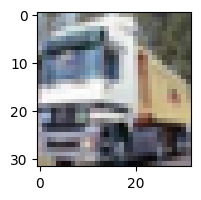

In [10]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[1])

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[1]

'automobile'

In [16]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

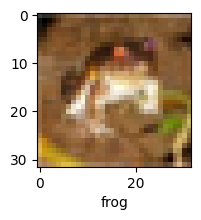

In [17]:
plot_sample(X_train,y_train,0)

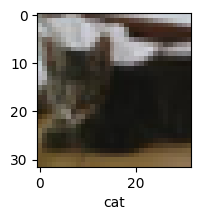

In [18]:
plot_sample(X_train,y_train,9)

In [19]:
X_train=X_train/255
X_test=X_test/255

In [20]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 109s 53ms/step - loss: 1.8358 - accuracy: 0.3468
Epoch 2/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6488 - accuracy: 0.4174
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5675 - accuracy: 0.4472
Epoch 4/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5068 - accuracy: 0.4683
Epoch 5/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4602 - accuracy: 0.4836


In [21]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 15ms/step - loss: 1.4573 - accuracy: 0.4834


[1.4573107957839966, 0.48339998722076416]

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 16ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.57      0.52      1000
           1       0.69      0.48      0.57      1000
           2       0.35      0.42      0.38      1000
           3       0.36      0.33      0.34      1000
           4       0.46      0.32      0.38      1000
           5       0.42      0.33      0.37      1000
           6       0.46      0.64      0.53      1000
           7       0.57      0.54      0.55      1000
           8       0.53      0.68      0.59      1000
           9       0.60      0.52      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [23]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    
    layers.Flatten(),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 164s 97ms/step - loss: 1.3163 - accuracy: 0.5309
Epoch 2/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.9567 - accuracy: 0.6639
Epoch 3/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.7672 - accuracy: 0.7314
Epoch 4/10
1563/1563 [==============================] - 150s 96ms/step - loss: 0.6045 - accuracy: 0.7887
Epoch 5/10
1563/1563 [==============================] - 151s 96ms/step - loss: 0.4456 - accuracy: 0.8456
Epoch 6/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.3058 - accuracy: 0.8943
Epoch 7/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.1973 - accuracy: 0.9319
Epoch 8/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.1396 - accuracy: 0.9526
Epoch 9/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.1073 - accuracy: 0.9639
Epoch 10/10
1563/1563 [==============================] 

In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 39s 23ms/step - loss: 1.5501 - accuracy: 0.7072


[1.5501004457473755, 0.7071999907493591]

In [27]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

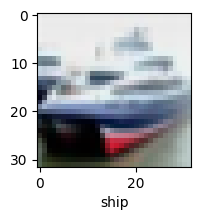

In [28]:

plot_sample(X_test,y_test,1)

In [29]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 11s 30ms/step


array([[3.3695624e-09, 2.6531407e-06, 3.6078545e-06, 9.9547172e-01,
        4.1443640e-09, 4.5210901e-03, 1.4273260e-07, 1.3494656e-07,
        5.6781039e-07, 3.0087322e-09],
       [2.1145276e-07, 3.2843607e-06, 7.0362464e-19, 7.9152640e-18,
        6.4397909e-22, 5.9251492e-22, 8.7430046e-25, 6.2622985e-19,
        9.9999654e-01, 8.4337390e-12],
       [8.6493892e-05, 4.9879197e-03, 3.5265347e-07, 1.9751624e-05,
        5.5260825e-05, 5.9391124e-07, 7.6452392e-07, 3.4360543e-08,
        9.8541182e-01, 9.4370162e-03],
       [9.9775118e-01, 2.4522657e-05, 1.4652319e-04, 4.9777486e-04,
        5.7352522e-06, 1.6925352e-07, 1.6669323e-05, 2.8893892e-09,
        1.5052194e-03, 5.2248884e-05],
       [2.0467836e-16, 1.1391320e-10, 2.4448630e-06, 5.5828848e-05,
        9.9959546e-01, 1.6912821e-09, 3.4617234e-04, 5.6606907e-17,
        5.3173372e-11, 2.2644657e-11]], dtype=float32)

In [30]:
np.argmax(y_pred[0])

3

In [31]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

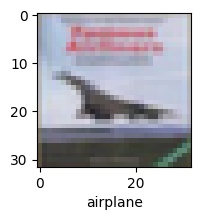

In [39]:
plot_sample(X_test,y_test,3)

In [40]:
classes[y_classes[3]]


'airplane'